# Loan Data by Prosper
## by Sash

## Preliminary Wrangling

> This project is on a data set from Prosper, which is America’s first marketplace lending platform, with over $7 billion in funded loans. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [5]:
# load in the dataset into a pandas dataframe
prosperLoanData = pd.read_csv(r'prosperLoanData.csv')

In [6]:
# high-level overview of data shape and composition
print(prosperLoanData.shape)
print(prosperLoanData.dtypes)
print(prosperLoanData.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [7]:
#Display all Data types
prosperLoanData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
#Find the null values
prosperLoanData.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [9]:
#Displaying all columns
pd.set_option('display.max_columns', None)
prosperLoanData

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.6300,3001.00,1185.6300,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2000,4091.09,1052.1100,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.0906

### What is the structure of your dataset?

> The dataset has 113937 rows and 81 columns. 

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in figuring out the features which are benefecial for receiving loan from Prosper. 
The main features of interest in the dataset are 
1. ProsperScore
2. Term, IncomeRange, StatedMonthlyIncome
3. TotalProsperLoans, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding
4. Occupation, EmploymentStatus, IsBorrowerHomeowner

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I understand ProsperScore to be the deciding factor for receiving loans and I expect IncomeRange to have the strongest impact. I also think that the DebtToIncomeRatio, Occupation, EmploymentStatus to be crucial whilst TotalProsperLoans, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding to have an effect on the amount borrowed. 
The features wwhich I will use in the investigation are : Term, LoanStatus, BorrowerAPR, BorrowerRate, ProsperRating (numeric), ProsperScore, Occupation, EmploymentStatus, IsBorrowerHomeowner, DebtToIncomeRatio, IncomeRange, TotalProsperLoans, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding. Along the way I found CreditScoreRangeUpper, TotalCreditLinespast7years, LoanOriginalAmount to be useful.

## Univariate Exploration
### I will start by looking at the main variable of interest i.e. ProsperScore

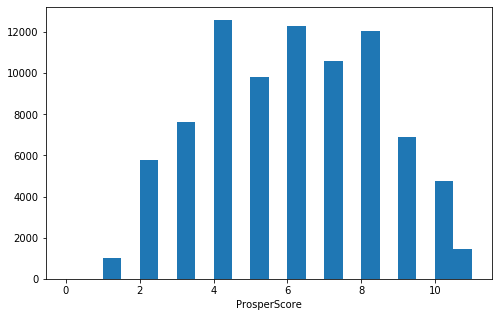

In [10]:
## standard-scaled plot
binsize = 0.5
bins = np.arange(0, prosperLoanData['ProsperScore'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperLoanData, x = 'ProsperScore', bins = bins)
plt.xlabel('ProsperScore')
plt.show()

#### ProsperScore is following the normal distribution where there maximum number of people are on 4. Scores 6 and 8 are also very close to it. Almost nobody has received the score of 0 whereas there are some cases of score being 11, which probably is an outlier.

### Now, I will check on the StatedMonthlyIncome

In [11]:
prosperLoanData.StatedMonthlyIncome.value_counts()

4166.666667    3526
5000.000000    3389
3333.333333    2917
3750.000000    2428
5416.666667    2374
               ... 
7101.000000       1
2701.083333       1
8183.833333       1
8477.666667       1
3843.500000       1
Name: StatedMonthlyIncome, Length: 13502, dtype: int64

In [12]:
prosperLoanData.StatedMonthlyIncome.nunique()

13502

In [13]:
prosperLoanData.StatedMonthlyIncome.max()

1750002.916667

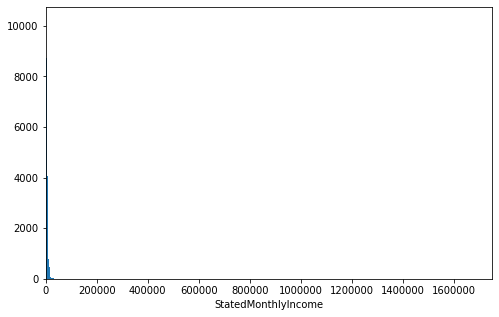

In [14]:
# plotting StatedMonthlyIncome on a standard scale
binsize = 500
bins = np.arange(0, prosperLoanData['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperLoanData, x = 'StatedMonthlyIncome', bins = bins)
plt.xlim([0,1750000])
plt.xlabel('StatedMonthlyIncome')
plt.show()

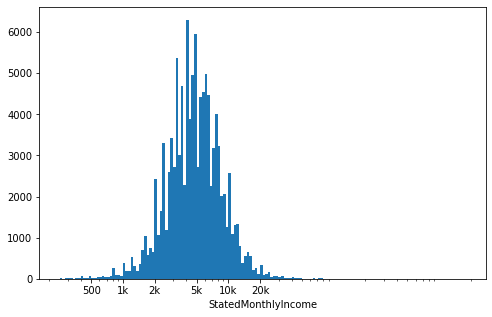

In [15]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(prosperLoanData['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperLoanData, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('StatedMonthlyIncome')
plt.show()

#### Ignoring the outliers, the chart is rescaled

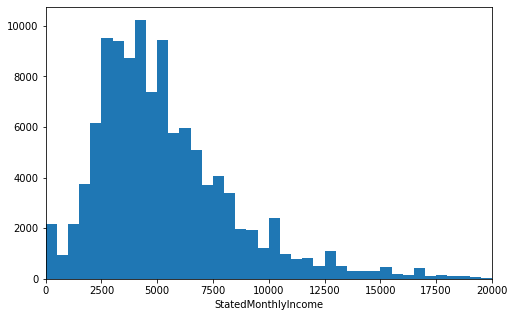

In [16]:
# including the salaries of a maximum 20K per month
binsize = 500
bins = np.arange(0, prosperLoanData['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperLoanData, x = 'StatedMonthlyIncome', bins = bins)
plt.xlim([0,20000])
plt.xlabel('StatedMonthlyIncome')
plt.show()

### Analyze number of listings in each state

In [17]:
# count of each state in the data
states_count =  prosperLoanData.BorrowerState.value_counts()

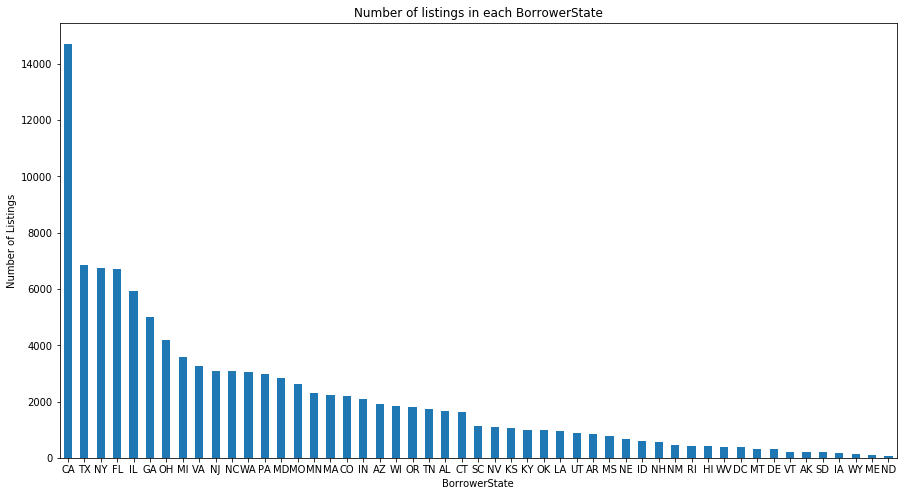

In [18]:
# plots the bar graph
color = sb.color_palette()[0]

plt.figure(figsize=(15, 8))
states_count.plot(kind='bar', color=color);

plt.title('Number of listings in each BorrowerState');
plt.xlabel('BorrowerState');
plt.ylabel('Number of Listings');

plt.xticks(rotation=0);

### Insights

The dataset shows that CA has the highest number of loans processed and TX, NY, FL are almost at a similar listing whilst, IA, WY, ME and ND are miniscule in comparison.  

### The number of listings under each LoanStatus available

In [19]:
# count of each status type available
status_count = prosperLoanData.LoanStatus.value_counts()

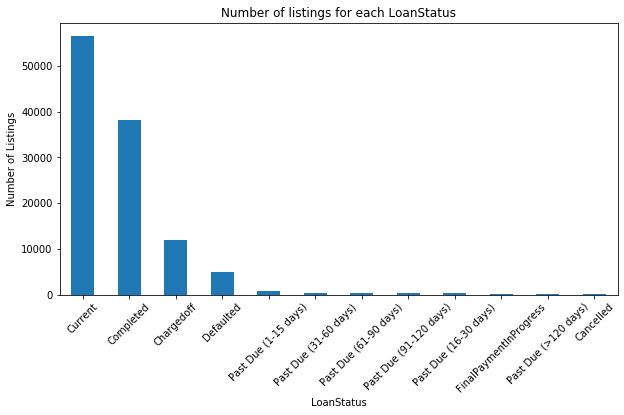

In [20]:
# plots the bar graph for loan statuses

plt.figure(figsize=(10, 5))
status_count.plot(kind='bar', color=color);

plt.title('Number of listings for each LoanStatus');
plt.xlabel('LoanStatus');
plt.ylabel('Number of Listings');

plt.xticks(rotation=45);

### Insights
The dataset showcases highest number of listings are current loans followed by completed loans. There are chargedoff loans which have a higher number of listing than the defaulted loan counts. Other statuses include dues for various intervals and cancelled whose frequency is too less

### The number of listing under the loan terms given.

In [21]:
Term_count = prosperLoanData.Term.value_counts()

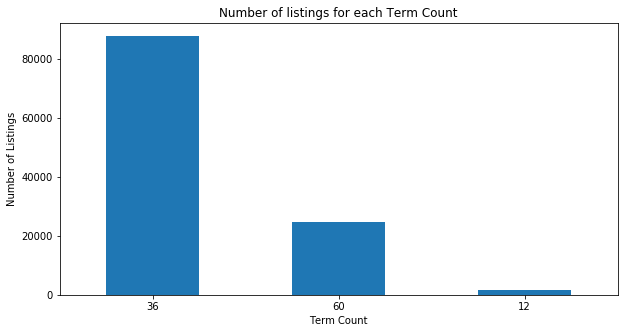

In [22]:
# plots the bar graph for Term Count

plt.figure(figsize=(10, 5))
Term_count.plot(kind='bar', color=color);

plt.title('Number of listings for each Term Count');
plt.xlabel('Term Count');
plt.ylabel('Number of Listings');

plt.xticks(rotation=0);

The number of listings in each Term Count are analysed and the plot shows that most of the loans were given for 36 months timeframe. The amount given through Loans for a 12 month time frame is considerably less.

### Income rate distribution of listings

In [23]:
Income_range = prosperLoanData.IncomeRange.value_counts()

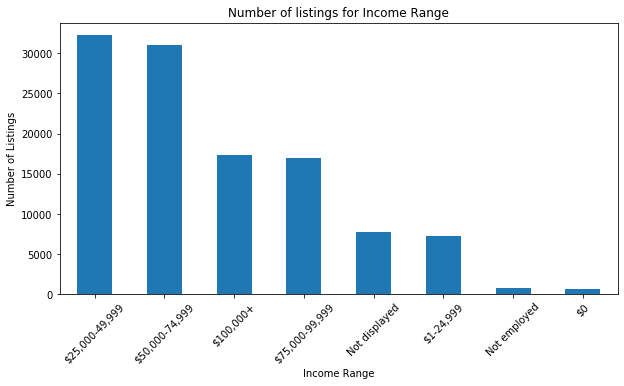

In [24]:
# plots the bar graph for Income range

plt.figure(figsize=(10, 5))
Income_range.plot(kind='bar', color=color);

plt.title('Number of listings for Income Range');
plt.xlabel('Income Range');
plt.ylabel('Number of Listings');

plt.xticks(rotation=45);

The income rate distribution is analyzed to know the average income rate of listings. The plot says that most listings fall under 50000 dollars, followed by 50000-74999 dollars and so on. This also concludes that the more the income rate the less the listings count.

### Plotting IncomeRange, EmploymentStatus and Term to further explore the data

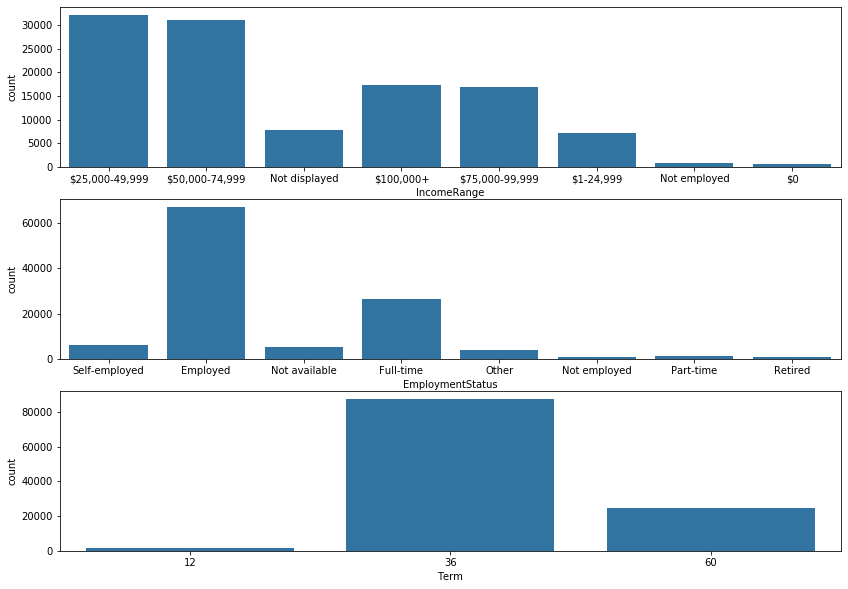

In [25]:
# Plotting IncomeRange, EmploymentStatus and Term to further explore the data

fig, ax = plt.subplots(nrows=3, figsize = [14,10])

default_color = sb.color_palette()[0]
sb.countplot(data = prosperLoanData, x = 'IncomeRange', color = default_color, ax = ax[0])
sb.countplot(data = prosperLoanData, x = 'EmploymentStatus', color = default_color, ax = ax[1])
sb.countplot(data = prosperLoanData, x = 'Term', color = default_color, ax = ax[2])

plt.show()

Fig 1 - Most people have the salaries between 25K to 75K. <Br>
Fig 2 - Employed people are the majority. <Br>
Fig 3 - Majority of the loans have been given on a 36 month basis. <Br>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
Prosper score had a normal distribution in a general sense however there are outliers present. <br>
The StatedMonthlyIncome variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked normal. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Because of the large volume of data present, no cleaning has been done up untill now so as to not disturb the sanctity of the data.

## Bivariate Exploration

To look at the pairwise correlations present between features in the data.

In [26]:
numeric_vars = ['BorrowerAPR', 'BorrowerRate', 'AvailableBankcardCredit', 'DebtToIncomeRatio', 
                  'StatedMonthlyIncome', 'ProsperPrincipalBorrowed', 'LoanOriginalAmount', 'MonthlyLoanPayment']
categoric_vars = ['ProsperRating (numeric)', 'ProsperScore', 'Occupation', 
			'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange']

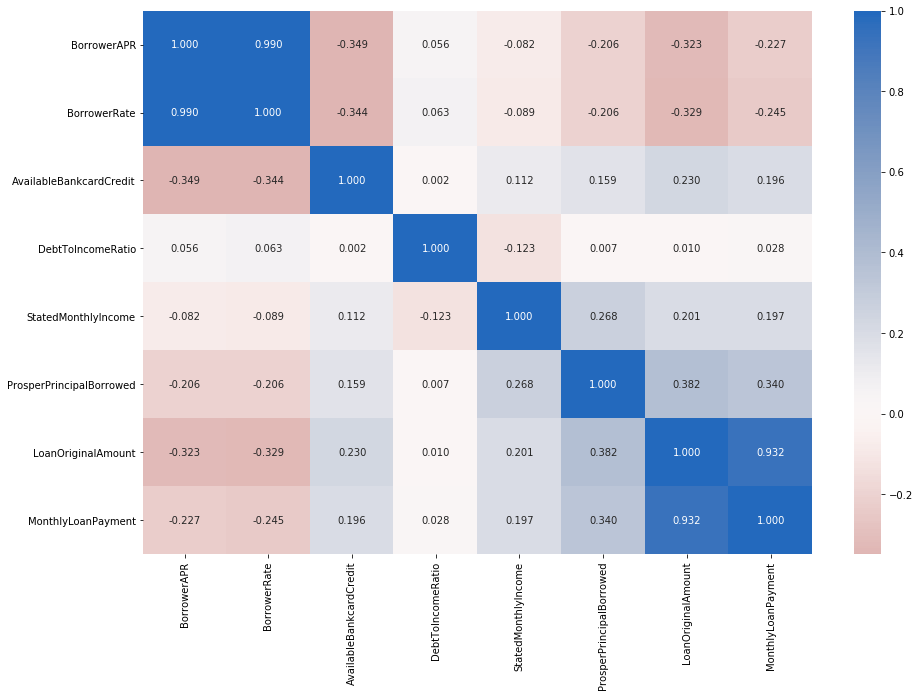

In [27]:
# correlation plot
plt.figure(figsize = [15, 10])
sb.heatmap(prosperLoanData[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

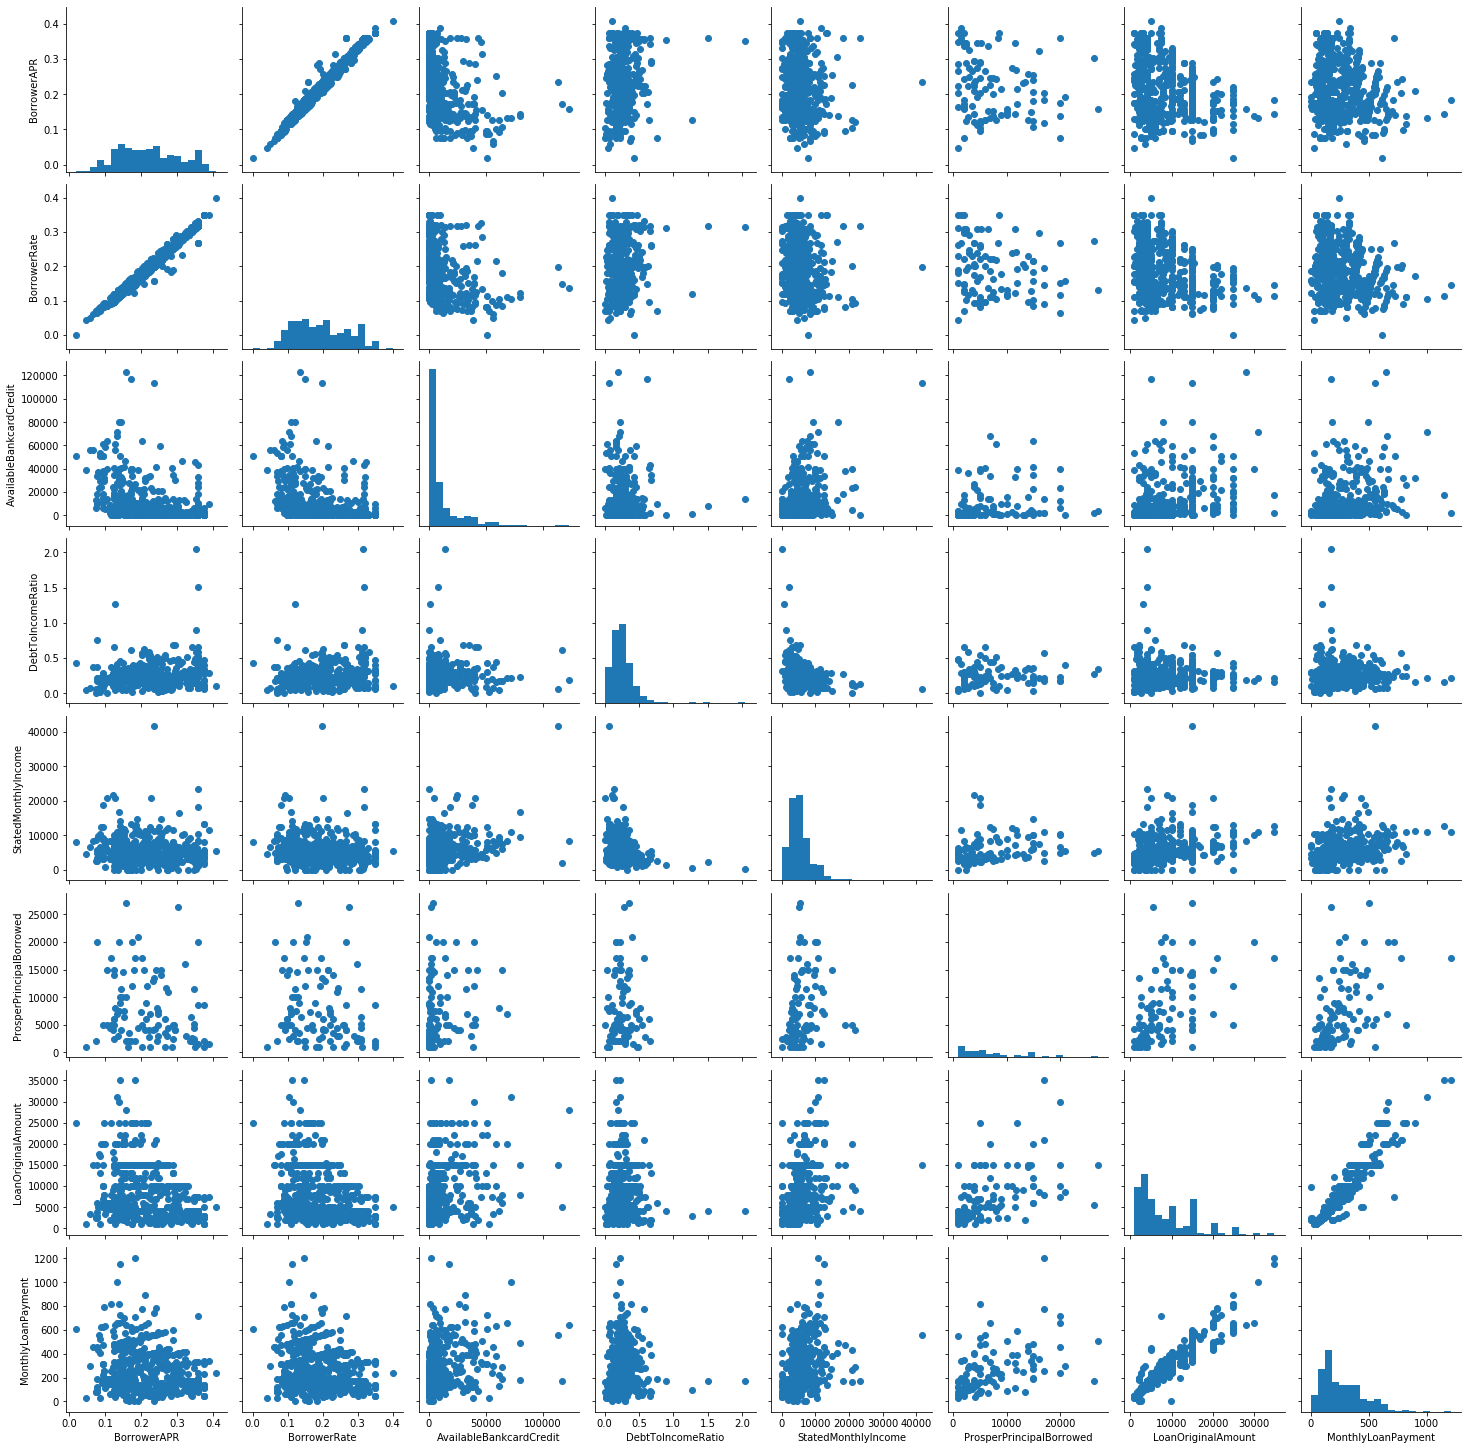

In [28]:
# plot matrix: sample 500 so that plots are clearer and they render faster
samples = np.random.choice(prosperLoanData.shape[0], 500, replace = False)
LoanData_sample = prosperLoanData.loc[samples,:]

g = sb.PairGrid(data = LoanData_sample, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

<Figure size 288x288 with 0 Axes>

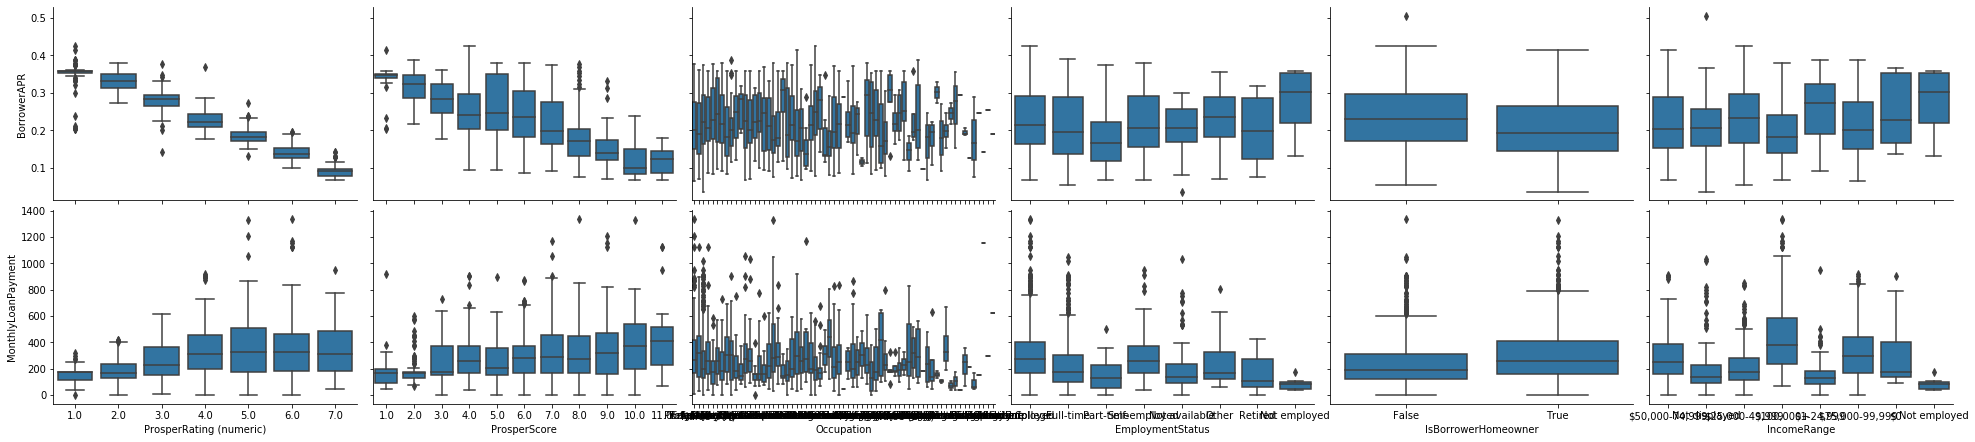

In [29]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(prosperLoanData.shape[0], 2000, replace = False)
LoanData_sample = prosperLoanData.loc[samples,:]

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [4, 4])
g = sb.PairGrid(data = LoanData_sample, y_vars = ['BorrowerAPR', 'MonthlyLoanPayment'], 
	x_vars = categoric_vars, height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

### AvailableBankcardCredit vs. BorrowerRate

Text(0.5, 1.0, 'AvailableBankcardCredit vs. BorrowerRate')

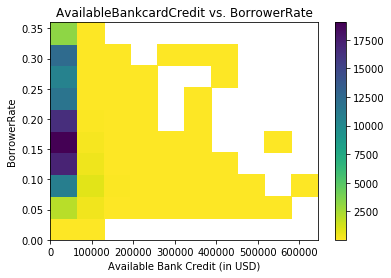

In [30]:
# remove the null entries
loan_data_sub = prosperLoanData.loc[prosperLoanData.AvailableBankcardCredit.notnull()]

# plots the hist2d graph 
plt.hist2d(data=loan_data_sub, x='AvailableBankcardCredit', y='BorrowerRate', cmap = 'viridis_r', cmin = 0.5);
plt.colorbar()

plt.xlabel('Available Bank Credit (in USD)')
plt.ylabel('BorrowerRate')
plt.title('AvailableBankcardCredit vs. BorrowerRate')

In this case, a hist2d plot is used because most of the listings have same range of bank card credit, there needs to be an intense segregation to see the diffusion between them and the plot says the more the amount in their bank card, the less the loans they take and less the borrower rate in most cases.

### Income range vs ProsperPrincipalBorrowed

Text(0.5, 0, 'Prosper Principal Borrowed (in USD)')

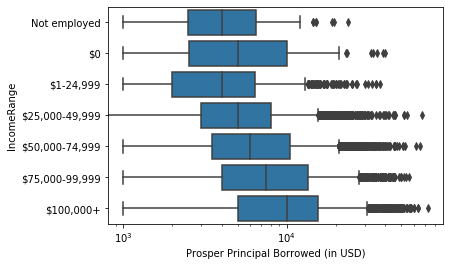

In [31]:
# orders the x axis 
order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

# plots the boxplot
sb.boxplot(data=prosperLoanData, y='IncomeRange', x='ProsperPrincipalBorrowed', 
           orient ="h", color= color, order=order);

# scale the x axis with log to analyze more accurately
plt.xscale('log')

plt.yticks(rotation=0);
plt.xlabel('Prosper Principal Borrowed (in USD)')

### Insights

Prosper principal borrowed is higher with high income range customers. 

### Compare ProsperScore to IncomeRange

Text(0, 0.5, 'IncomeRange')

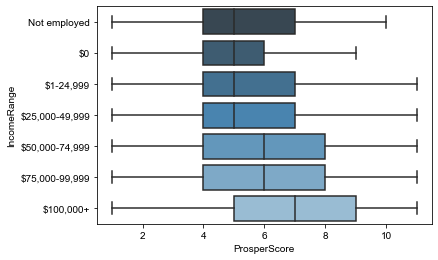

In [32]:
sb.boxplot(data=prosperLoanData, x='ProsperScore', y='IncomeRange', palette=("Blues_d") , order=order);

sb.set(style="whitegrid")
plt.xticks(rotation=0);
plt.ylabel('IncomeRange')

Prosper Score increases as the salary of an individual increases while being not employed is still more than a zero dollar income

### Compare ProsperScore to LoanOriginalAmount

Text(0, 0.5, 'LoanOriginalAmount')

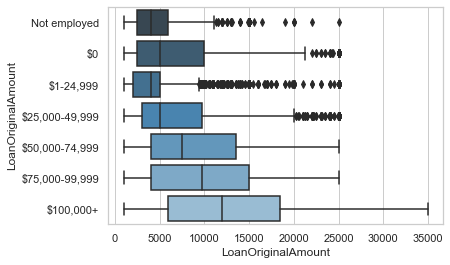

In [33]:
sb.boxplot(data=prosperLoanData, x='LoanOriginalAmount', y='IncomeRange', palette=("Blues_d") , order=order);

sb.set(style="whitegrid")
plt.xticks(rotation=0);
plt.ylabel('LoanOriginalAmount')

### BorrowerRate pattern over years

In [34]:
# Get the year from the creation date and create a column for it
prosperLoanData['year'] = prosperLoanData.ListingCreationDate.str.split('-').str[0]
year_data = prosperLoanData.year.value_counts()

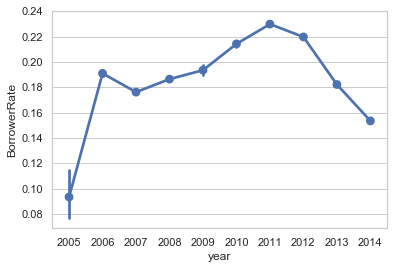

In [35]:
# plots the pointplot for year vs BorrowerRate
sb.pointplot(data=prosperLoanData, x='year', y='BorrowerRate');

### Insights
Point plot is used to analyze this and it suites the analysis because this graph shows the nature of the variable from one xfactor to another. For this scenario, it shows ​that rate of interest increased from 2005-2006 and then fell off from 2006-2007 and then it constantly picked up for few years, reached its peak in 2011 which then started decreasing constantly.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In the Bivariate part of the analysis, AvailableBankcardCredit is contrasted to BorrowerRate and Income range towards  ProsperPrincipalBorrowed. Also, BorrowerRate pattern has been analysed over years. 
Null values were removed from the AvailableBankCardCredit. The relationship was that the less borrower rate when more bank credit is available.
In the second one, the relation is propser principal borrowed is directly correlated to the income range excluding 0 or not employed. 
In the third graph, a pattern has been deciphered which shows that the rate of interest increased from 2005-2006 and then fell off from 2006-2007 and then it constantly picked up for few years, reached its peak in 2011 which then started decreasing constantly.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The borrower rate has changed quite frequently and is dependent on many features of the dataset. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Analyse how the BorrowerRate changed over years for Homeowners vs Non-Homeowners

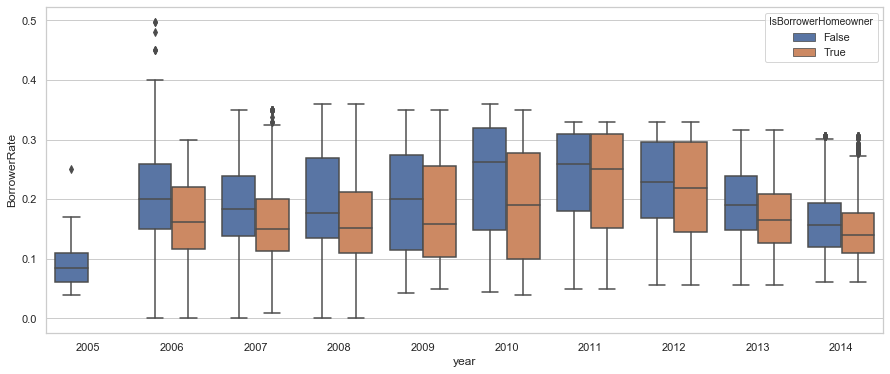

In [36]:
# plots the boxplot to analyze homeowner's and non-homeowner's rate over years

g = sb.boxplot(data=prosperLoanData, x='year', y='BorrowerRate', hue='IsBorrowerHomeowner');
g.figure.set_figwidth(15)
g.figure.set_figheight(6)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Borrower rate increased for some years in case of non homeowners, however it constantly decreased around 2010. As regards of homeowners, there wasn't much difference till 2009 but after 2009, the graph went up till 2011 and started falling off from then.

### Analyze BorrowerAPR vs ProsperScore on difference letter ratings

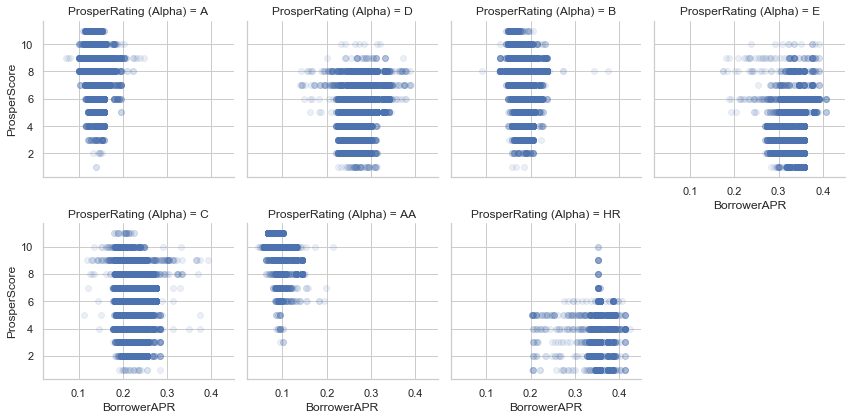

In [37]:
g = sb.FacetGrid(data = prosperLoanData, col = 'ProsperRating (Alpha)', col_wrap = 4, height = 3)
g.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('ProsperScore')

plt.show()

FacetGrid: This visualization helps to analyze BorrowerAPR vs ProsperScore on difference letter ratings. The patterns shows the lowerest rating(HR) of borrowers have the highest APR. For high rating A(A), the borrowers has the lowers APR. This visualization differenate groups of people in terms of APR received based on their rating and scores.

### BorrowerAPR vs. CreditScoreRangeUpper & ProsperScore

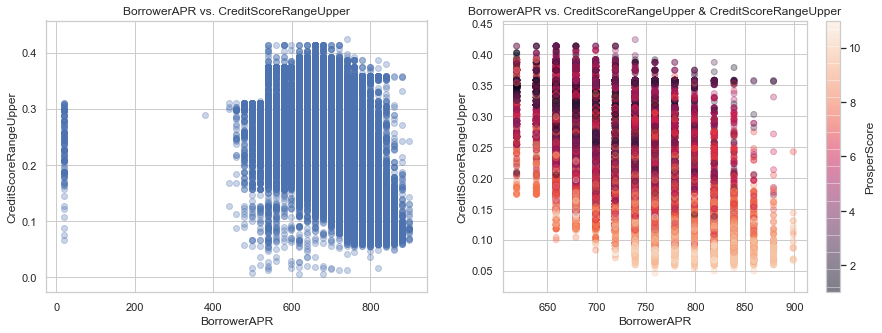

In [38]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = prosperLoanData, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', alpha = 0.3)
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');


plt.subplot(1, 2, 2)
plt.scatter(data = prosperLoanData, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');

Since CreditScoreRangeUpper and ProsperScore are positive correlated to borrowerAPR, this visualization helps to see the effects on BorrowerAPR.
By adding ProsperScore to color encodings, BorrowerAPR decreases as ProsperScore increases. This shows that CreditScoreRangeUpper and ProsperScore are negatively correlated to BorrowerAPR.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From all above visualizations created from univariate exploration to multivariate exploration, many variable are found to be negatively correlated to BorrowerAPR, whereas ProspoerScore gives the strongest negative relationship.

### The effect of TotalCreditLinespast7years and IncomeRange for BorrowerRate and LoanOriginalAmount.

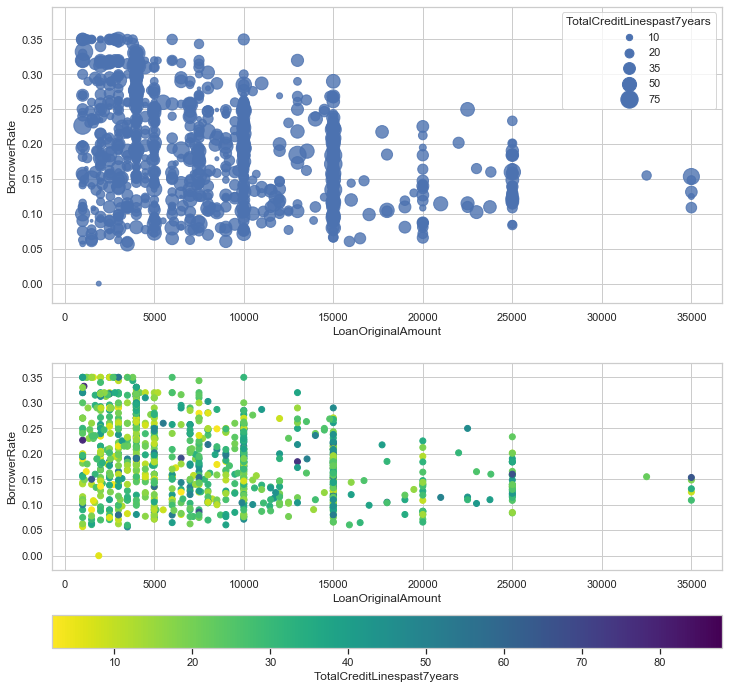

In [39]:
#np.random.seed(2018)
sample=np.random.choice(prosperLoanData.shape[0],1000, replace=False)
prosperLoanData_subset=prosperLoanData.loc[sample]

plt.figure(figsize = [12,12])
plt.subplot(2,1,1)
ax1=sb.regplot(data=prosperLoanData_subset,x="LoanOriginalAmount",y="BorrowerRate",
          x_jitter=0.04, fit_reg=False,
          scatter_kws={'s':prosperLoanData_subset["TotalCreditLinespast7years"]*4})
plt.xlabel("LoanOriginalAmount")
plt.ylabel("BorrowerRate")
sizes=[10, 20, 35,50, 75]
base_color=sb.color_palette()[0]
legend_obj=[]
for s in sizes:
    legend_obj.append(plt.scatter([],[],s=s*4,color=base_color))
plt.legend(legend_obj,sizes,title="TotalCreditLinespast7years");

plt.subplot(2,1,2)
ax2=plt.scatter(data=prosperLoanData_subset,x="LoanOriginalAmount",y="BorrowerRate",
            c="TotalCreditLinespast7years", cmap="viridis_r")
plt.xlabel("LoanOriginalAmount")
plt.ylabel("BorrowerRate")
plt.colorbar(label="TotalCreditLinespast7years",orientation="horizontal");
#plt.ylim(ax1.get_ylim()); # to get exactly the same y lim as the previous subplot

I tried using both size and color to find the effect of TotalCreditLinespast7years in a scatter plot of BorrowerRate vs. LoanOriginalAmount. As it is shown, TotalCreditLinespast7years does not play a significant role on controling the BorrowerRate and LoanOriginalAmount relationship.

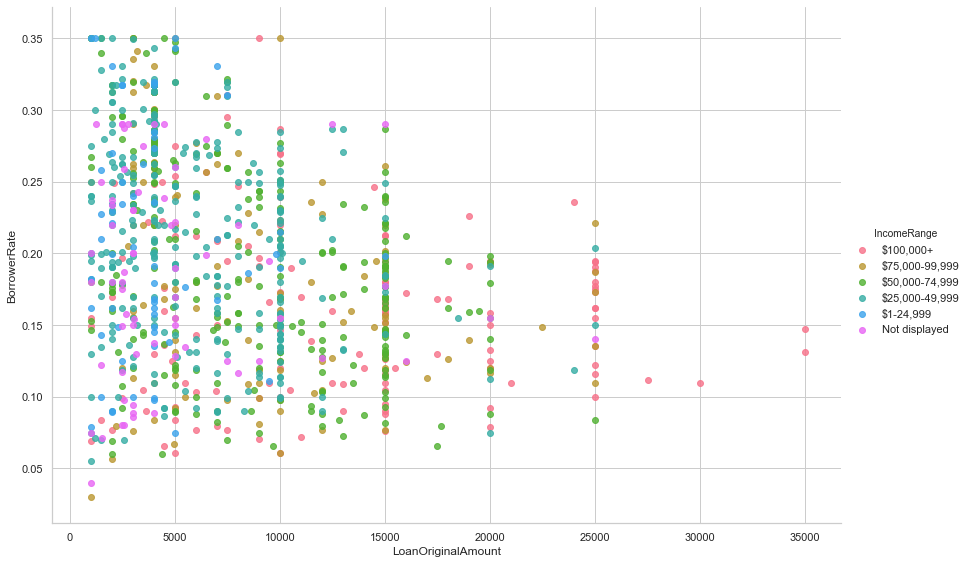

In [40]:
#np.random.seed(18)
sample=np.random.choice(prosperLoanData.shape[0],1000, replace=False)
prosperLoanData_subset=prosperLoanData.loc[sample]
IncomeRange_order=[ "$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","Not displayed" ] 
g=sb.FacetGrid(data=prosperLoanData_subset,hue="IncomeRange",hue_order=IncomeRange_order,
               height=8, aspect=1.5,palette="husl")
g=g.map(sb.regplot,"LoanOriginalAmount","BorrowerRate",x_jitter=0.5,fit_reg=False);
g.add_legend()
plt.xlabel("LoanOriginalAmount")
plt.ylabel("BorrowerRate");

I used color to investigate the effect of IncomeRange on the relationship between BorrowerRate and LoanOriginalAmount. It seems by increasing the LoanOriginalAmount BorrowerRate decreases. Besides, apparently only those who has a IncomeRange above 100k, are borrowing higher LoanOriginalAmount (>25K) and their BorrowerRate is <0.15. Note that, there are other examples which are not following the same trend. For example, you may find, people with a IncomeRange above 100k who has lower LoanOriginalAmount and higher BorrowerRate.

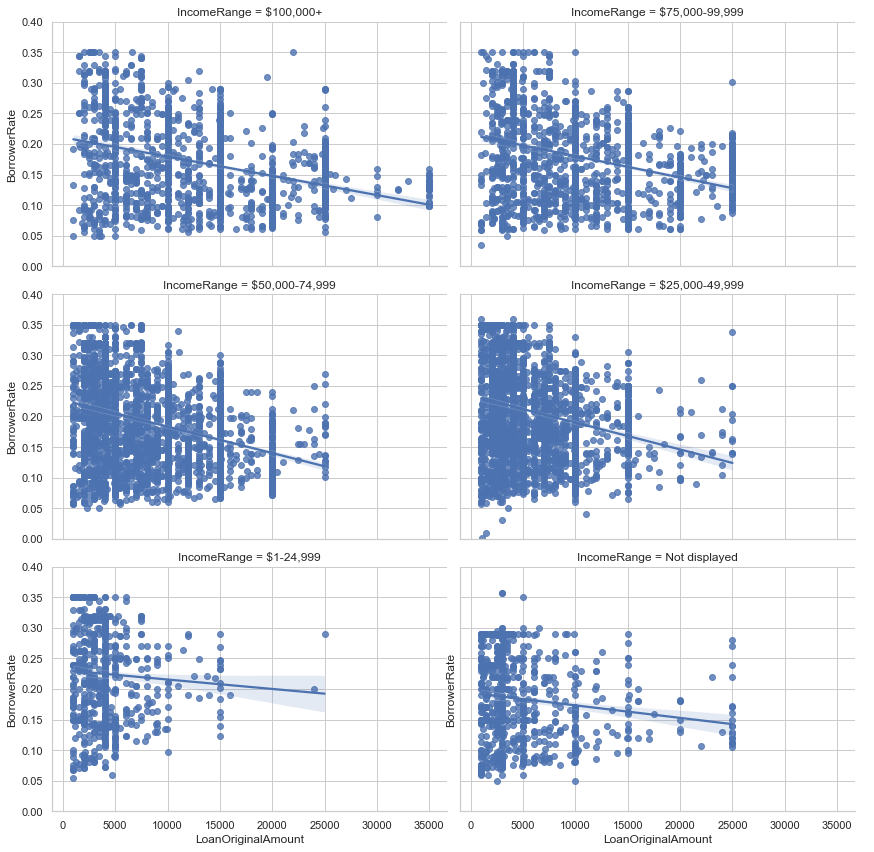

In [41]:
### Now, I am curiuos to see how the BorrowerRate and LoanOriginalAmount is changing in each IncomeRange category.
sample=np.random.choice(prosperLoanData.shape[0],10000, replace=False)
prosperLoanData_subset=prosperLoanData.loc[sample]
IncomeRange_order=[ "$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","Not displayed" ] 
g=sb.FacetGrid(data=prosperLoanData_subset,col="IncomeRange",col_order=IncomeRange_order,
               height=4, aspect=1.5,palette="husl",col_wrap=2)
g=g.map(sb.regplot,"LoanOriginalAmount","BorrowerRate",x_jitter=0.1,fit_reg=True);
g.add_legend()
plt.xlabel("LoanOriginalAmount")
plt.ylim(0,0.40)
plt.ylabel("BorrowerRate");

At each particular IncomeRange, by increasing the LoanOriginalAmount, the BorrowerRate decreases.

### Effect of ProsperScore, the relationship between BorrowerRate and LoanOriginalAmount.

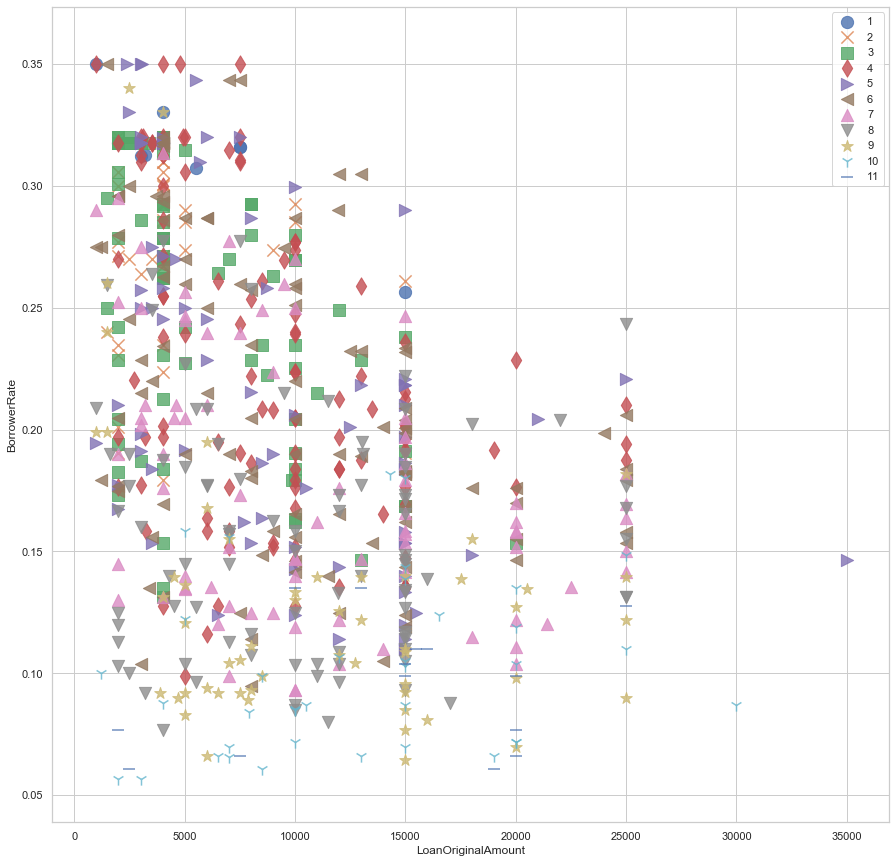

In [42]:
sample=np.random.choice(prosperLoanData.shape[0],1000, replace=False)
prosperLoanData_subset=prosperLoanData.loc[sample]
prosperLoanData_subset=prosperLoanData_subset.query('ProsperScore!=0')
prosperLoanData_subset=prosperLoanData_subset[~prosperLoanData_subset['ProsperScore'].isnull()]

score_markers=[["1", "o"], ["2", "x"], ["3", "s"], ["4", "d"], ["5", ">"], ["6", "<"], 
               ["7", "^"],["8", "v"], ["9", "*"], ["10", "1"], ["11", "_"]]

fig = plt.figure(figsize = [15,15])
for i, marker in score_markers:
    score=float(i)
    data=prosperLoanData_subset.loc[prosperLoanData_subset["ProsperScore"]==score]
    sb.regplot(data=data, x="LoanOriginalAmount", y="BorrowerRate", 
               x_jitter=0.1, fit_reg=False, marker=marker,scatter_kws={'s':150})

plt.xlabel("LoanOriginalAmount")
plt.ylabel("BorrowerRate");
plt.legend(["1","2","3","4","5","6","7","8","9","10","11"]);

Lets see how this graph looks like using a FacetGrid. In each plot, I will show one one ProsperScore.

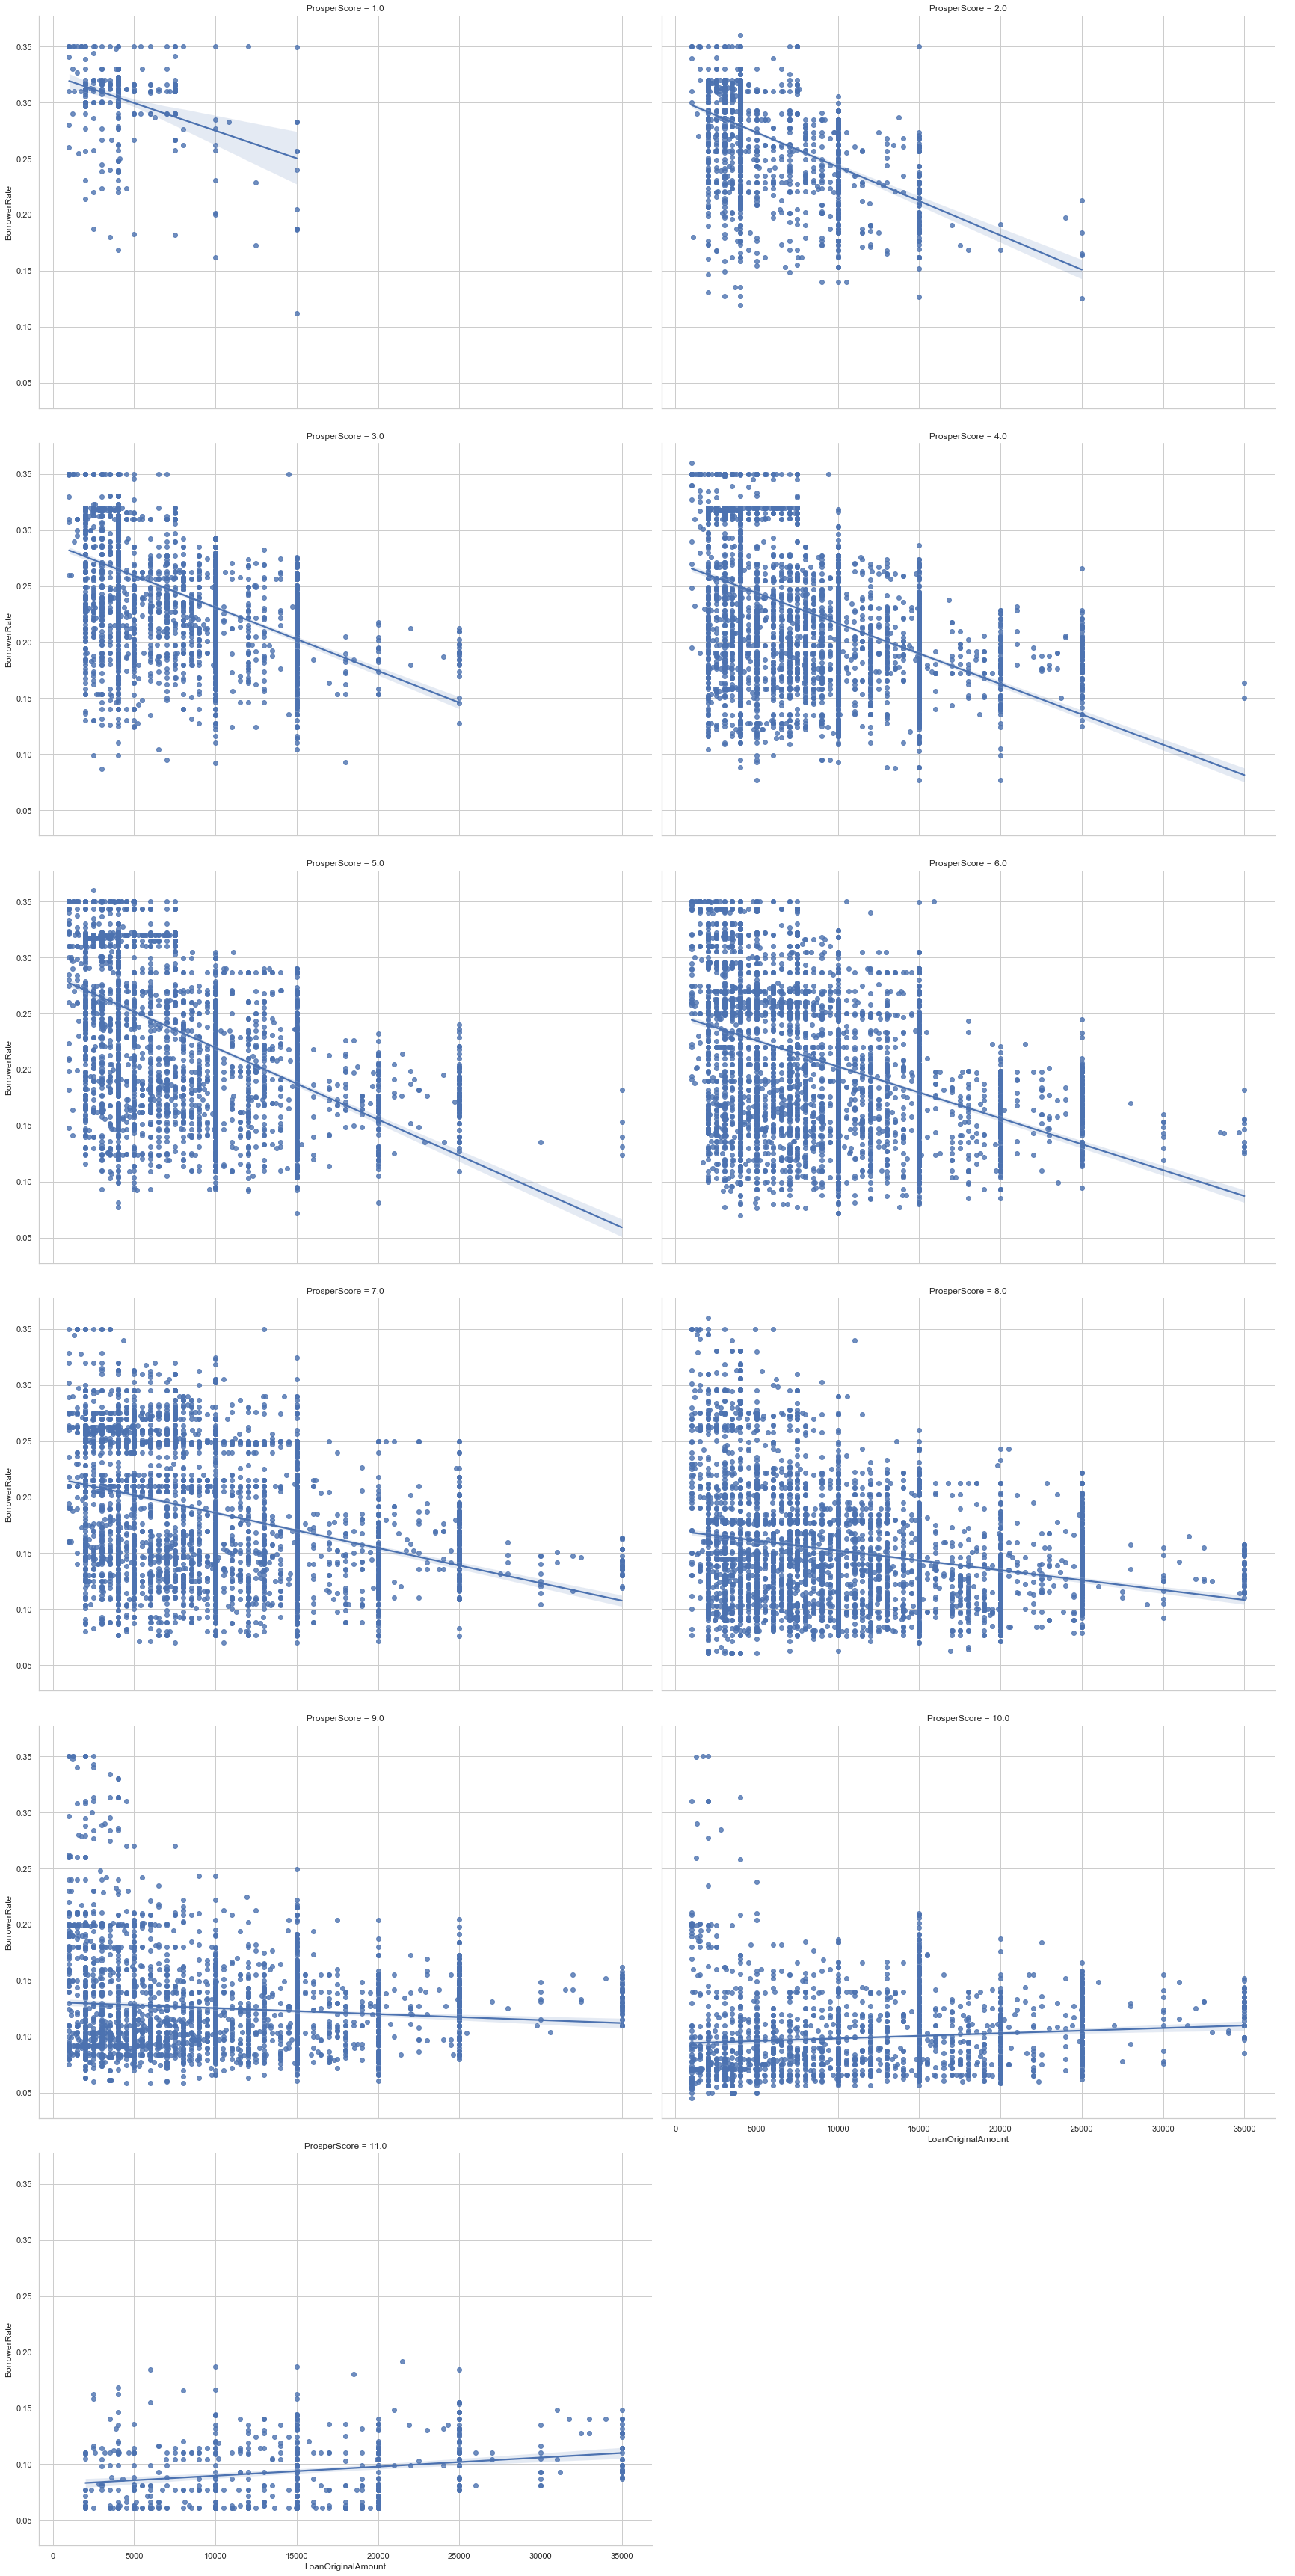

In [43]:
sample=np.random.choice(prosperLoanData.shape[0],50000, replace=False)
prosperLoanData_subset=prosperLoanData.loc[sample]
#IncomeRange_order=[ "$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","Not displayed" ] 
#col_order=IncomeRange_order,
g=sb.FacetGrid(data=prosperLoanData_subset,col="ProsperScore",
               height=8, aspect=1.5,palette="colorblind",col_wrap=2)
g=g.map(sb.regplot,"LoanOriginalAmount","BorrowerRate",x_jitter=0.1,fit_reg=True);
g.add_legend()
plt.xlabel("LoanOriginalAmount")
plt.ylabel("BorrowerRate");

### Effect of IncomeRange on ProsperScore and BorrowerRate relationship.

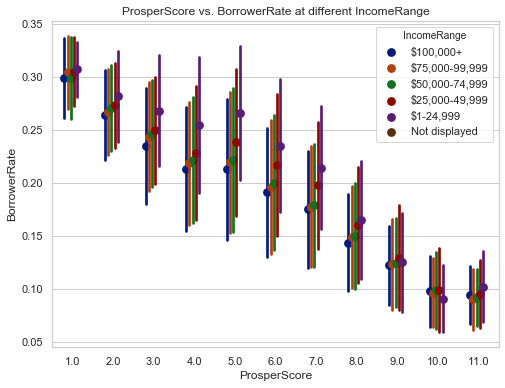

In [44]:
fig = plt.figure(figsize = [8,6])
IncomeRange_order=[ "$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","Not displayed" ] 
ax = sb.pointplot(data = prosperLoanData, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeRange',
                  hue_order=IncomeRange_order, palette = 'dark', linestyles = '', dodge = 0.4, ci="sd")# 
plt.title('ProsperScore vs. BorrowerRate at different IncomeRange')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerRate')
plt.show();

In general, increasing ProsperScore decreases BorrowerRate. Apparently, people with lower IncomeRange have higher BorrowerRate at each individual ProsperScore.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
TotalCreditLinespast7years does not play a significant role on controling the BorrowerRate and LoanOriginalAmount relationship.
At each particular IncomeRange, by increasing the LoanOriginalAmount, the BorrowerRate decreases. Besides, apparently only those who have an IncomeRange above 100k, are borrowing higher LoanOriginalAmount (>25000) and their BorrowerRate is <0.15.
Apparently, people with lower IncomeRange have higher BorrowerRate at each individual ProsperScore.

### Were there any interesting or surprising interactions between features?
In general, at lower ProsperScore (<8), increasing LoanOriginalAmount decreases the BorrowRate. And at higher ProsperScore (>9), the BorrowRate remain s constant at a low BorrowRate ~0.1